<a href="https://colab.research.google.com/github/atakhan27/Data-Science/blob/main/%20HW6_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Data description is provided below
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [21]:
df

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,0,6,0,0,0,0.0,0,0.00,10,12,...,0,4,4,1,1,15.0,15.0,0,0,8
1,0,7,0,0,0,5.0,674,2.50,5,12,...,0,4,4,1,1,15.0,15.0,0,0,4
2,1,1,0,0,1,2.0,1532,2.00,5,12,...,0,3,0,1,0,14.0,20.0,0,1,4
3,1,1,0,0,0,1.0,305,1.00,13,12,...,0,4,0,1,0,13.0,17.0,0,0,8
4,1,3,0,0,1,2.0,1428,1.00,1,12,...,0,4,0,1,0,15.0,18.0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,1,1,0,1,8.0,1845,2.67,4,25,...,0,3,0,1,0,15.0,17.0,0,0,3
9236,1,1,0,0,0,2.0,238,2.00,12,12,...,0,3,0,1,0,14.0,19.0,0,1,12
9237,1,1,1,0,0,2.0,199,2.00,12,12,...,0,3,0,1,0,13.0,20.0,0,1,12
9238,1,3,0,0,1,3.0,499,3.00,12,12,...,0,4,3,1,1,15.0,16.0,0,0,12


In [3]:
#There are missing values in the Lead data .
# Replace missing variables with the mean if variable is numeric or mode if variable is categorical.
for col in df.columns:
    if ((df[col].dtype == 'float64') or (df[col].dtype == 'float64')) :
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

In [4]:
#Check that there are no missing data
df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df = df.drop(columns=['Prospect ID','Lead Number'])
y = df['Converted']
X = df.drop(columns=['Converted'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [6]:
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))
 
 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')

In [7]:
#1)With optuna method and using train data choose best method among Random Forest","XGBoost", "LightGBM","GradientBoostingClassifier"
#and optimeze these method based on following parameters.
#max_depth = trial.suggest_int("max_depth", 2,X_train.shape[1])
#max_features = trial.suggest_int("max_features", 2,X_train.shape[1])
#Evaluate performance of the best method on test data using eval function defined above.
#Note: This should be similar to what we have done in the exercises in class. 

In [40]:
!pip install optuna

In [10]:
import optuna
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [11]:
def create_model(trial, model_name):
    max_depth = trial.suggest_int("max_depth", 2, X_train.shape[1])
    max_features = trial.suggest_int("max_features", 2, X_train.shape[1])

    if model_name == "RandomForest":
        n_estimators = trial.suggest_int("n_estimators", 10, 200)
        classifier = RandomForestClassifier(max_depth=max_depth, max_features=max_features, n_estimators=n_estimators)

    elif model_name == "XGBoost":
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.5)
        n_estimators = trial.suggest_int("n_estimators", 10, 200)
        classifier = xgb.XGBClassifier(max_depth=max_depth, max_features=max_features, n_estimators=n_estimators, learning_rate=learning_rate)

    elif model_name == "LightGBM":
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.5)
        n_estimators = trial.suggest_int("n_estimators", 10, 200)
        classifier = lgb.LGBMClassifier(max_depth=max_depth, max_features=max_features, n_estimators=n_estimators, learning_rate=learning_rate)

    elif model_name == "GradientBoostingClassifier":
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.5)
        n_estimators = trial.suggest_int("n_estimators", 10, 200)
        classifier = GradientBoostingClassifier(max_depth=max_depth, max_features=max_features, n_estimators=n_estimators, learning_rate=learning_rate)

    return classifier

In [12]:
def objective(trial):
    model_name = trial.suggest_categorical("model_name", ["RandomForest", "XGBoost", "LightGBM", "GradientBoostingClassifier"])
    classifier = create_model(trial, model_name)

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [40]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

In [14]:
print(f"Best trial: {study.best_trial}")

Best trial: FrozenTrial(number=42, state=TrialState.COMPLETE, values=[0.9444444444444444], datetime_start=datetime.datetime(2023, 4, 13, 7, 28, 12, 591640), datetime_complete=datetime.datetime(2023, 4, 13, 7, 28, 14, 125353), params={'model_name': 'XGBoost', 'max_depth': 30, 'max_features': 22, 'learning_rate': 0.38582433844354247, 'n_estimators': 44}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'model_name': CategoricalDistribution(choices=('RandomForest', 'XGBoost', 'LightGBM', 'GradientBoostingClassifier')), 'max_depth': IntDistribution(high=34, log=False, low=2, step=1), 'max_features': IntDistribution(high=34, log=False, low=2, step=1), 'learning_rate': FloatDistribution(high=0.5, log=False, low=0.01, step=None), 'n_estimators': IntDistribution(high=200, log=False, low=10, step=1)}, trial_id=42, value=None)


[07:28:29] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.

Accuracy: 0.9444444444444444
Precision: 0.9309366130558183
Recall: 0.923943661971831


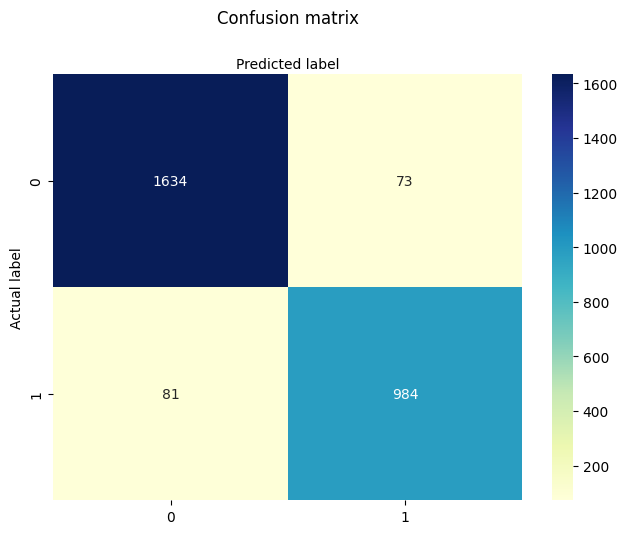

In [15]:
best_model_name = study.best_trial.params["model_name"]
best_model_params = {k: v for k, v in study.best_trial.params.items() if k != "model_name"}

best_classifier = create_model(optuna.trial.FixedTrial(best_model_params), best_model_name)
best_classifier.fit(X_train, y_train)

y_pred = best_classifier.predict(X_test)
eval(y_test, y_pred)

In [ ]:
#2)Using pycaret AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.

In [40]:
!pip install pycaret

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9335,0.9784,0.9056,0.9213,0.9131,0.8593,0.8597,0.4430
xgboost,Extreme Gradient Boosting,0.9302,0.9768,0.8964,0.9211,0.9083,0.8520,0.8525,0.9700
gbc,Gradient Boosting Classifier,0.9220,0.9748,0.8764,0.9180,0.8966,0.8341,0.8348,0.9740
ada,Ada Boost Classifier,0.9094,0.9675,0.8684,0.8941,0.8807,0.8078,0.8084,0.6120
rf,Random Forest Classifier,0.9083,0.9639,0.8558,0.9021,0.8780,0.8047,0.8057,1.8650
et,Extra Trees Classifier,0.9048,0.9621,0.8449,0.9023,0.8724,0.7966,0.7980,0.8960
dt,Decision Tree Classifier,0.8849,0.8819,0.8621,0.8437,0.8524,0.7582,0.7587,0.1940
lda,Linear Discriminant Analysis,0.8348,0.9009,0.7219,0.8278,0.7708,0.6427,0.6467,0.1130
ridge,Ridge Classifier,0.8339,0.0000,0.7184,0.8283,0.7691,0.6405,0.6447,0.1880
lr,Logistic Regression,0.8326,0.8942,0.7281,0.8188,0.7703,0.6394,0.6425,1.3720


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9387,0.9812,0.9183,0.9218,0.9200,0.8703,0.8703


Accuracy: 1.0
Precision: 1.0
Recall: 1.0


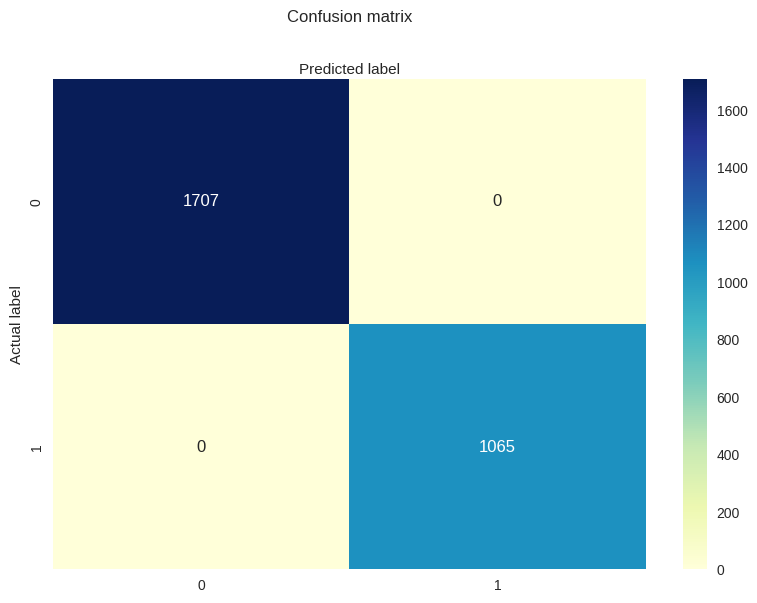

In [17]:
from pycaret.classification import setup, compare_models, predict_model

data = pd.concat([X_train, y_train], axis=1)
clf = setup(data=data, target='Converted', verbose=False)

best_model = compare_models()

test_data = pd.concat([X_test, y_test], axis=1)

predictions = predict_model(best_model, data=test_data)

eval(y_test, predictions['Converted'])

In [ ]:
#3) Using Autogluon  AutoML tools,make prediction on test data and evaluate performance of prediction using eval function defined above.

In [40]:
!pip install autogluon

In [27]:
print(X_train.columns)
print(X_test.columns)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')
Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not 

In [40]:
from autogluon.tabular import TabularPredictor
from sklearn.metrics import accuracy_score

train_data = pd.concat([X_train, y_train], axis=1)
train_data.columns = train_data.columns.astype(str)
train_data['Converted'] = train_data['Converted'].astype('category')

predictor = TabularPredictor(label='Converted').fit(train_data)
y_pred = predictor.predict(X_test)

In [38]:
y_test_int = y_test.astype(int)
y_pred_int = y_pred.astype(int)

In [39]:
accuracy = accuracy_score(y_test_int, y_pred_int)
print('Accuracy:', accuracy)

Accuracy: 0.9296536796536796


Accuracy: 0.9296536796536796
Precision: 0.9264705882352942
Recall: 0.8873239436619719


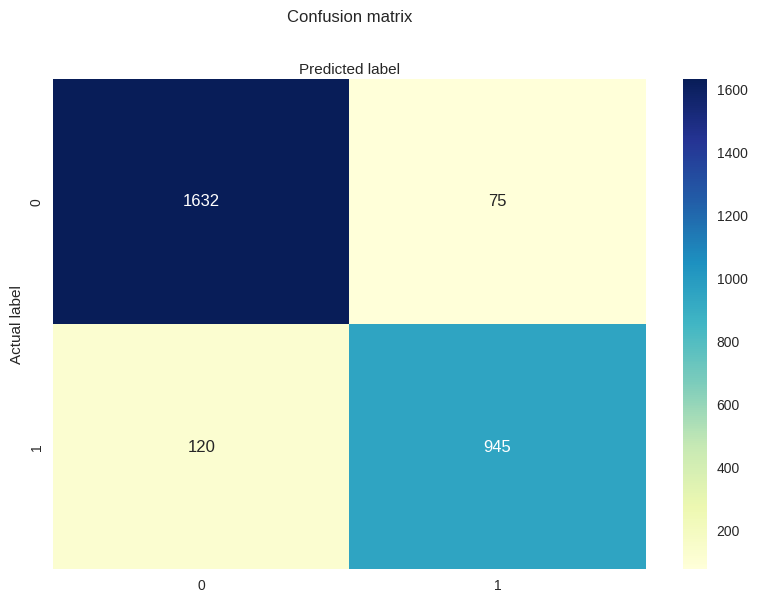

In [40]:
eval(y_test_int, y_pred_int)